<h1> Fundamental analysis of companys in Brazilian Stock Market <h1/>

<p>The objective of this work is to analyze the values of shares and decide which are the best companies to invest in based on their fundamentals<p/>
<img src='https://files.sunoresearch.com.br/p/uploads/2021/09/analise-fundametalista-1024x629.png' width="380" height="350"><img/>

<h2>Geeting the data and creating the organized dataset<h2/>

<p>We will get the fundamental data of the companies from Fundamentus website: https://fundamentus.com.br/index.php<p/>

In [45]:
#importing the library to get the stock market info 
import fundamentus
#import the library to deal with dataframes
import pandas as pd

#selecting the companies of interest
companies = ["ABEV3", "BTOW3", "B3SA3", "BBSE3", "BRML3", "BBDC4", "BRAP4", "BBAS3", "BRKM5", "BRFS3", "BPAC11", 
             "CRFB3", "CCRO3", "CMIG4", "HGTX3", "CIEL3", "COGN3", "CPLE6", "CSAN3", "CPFE3", "CVCB3", "CYRE3", "ECOR3", 
             "ELET6", "EMBR3", "ENBR3", "ENGI11", "ENEV3", "EGIE3", "EQTL3", "EZTC3", "FLRY3", "GGBR4", "GOAU4", "GOLL4", 
             "NTCO3", "HAPV3", "HYPE3", "IGTA3", "GNDI3", "ITSA4", "ITUB4", "JBSS3", "JHSF3", "KLBN11", "RENT3", "LCAM3", 
             "LAME4", "LREN3", "MGLU3", "MRFG3", "BEEF3", "MRVE3", "MULT3", "PCAR3", "PETR4", "BRDT3", "PRIO3", "QUAL3", 
             "RADL3", "RAIL3", "SBSP3", "SANB11", "CSNA3", "SULA11", "SUZB3", "TAEE11", "VIVT3", "TIMS3", "TOTS3", "UGPA3", 
             "USIM5", "VALE3", "VVAR3", "WEGE3", "YDUQ3"]

In [46]:
#getting results data
shares_info = fundamentus.get_resultado()
#filtering only the desired companies
shares_info = shares_info[shares_info.index.isin(companies)]
#show top lines of the dataframe
shares_info.head()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
ABEV3,13.58,14.19,2.37,2.595,0.0561,1.551,57.71,12.58,-24.31,11.76,8.66,0.2063,0.1882,0.1650,0.1671,1.11,333211000.0,9.025490e+10,0.04,0.1323
B3SA3,12.92,17.81,3.72,7.159,0.0325,1.570,13.78,13.91,-7.22,13.29,11.09,0.5148,0.4019,0.1652,0.2086,1.46,461352000.0,2.023380e+10,0.57,0.1448
BBAS3,51.90,4.45,0.93,0.000,0.0881,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.2083,0.00,495408000.0,1.604890e+11,0.00,0.2383
BBDC4,16.06,11.51,1.06,0.000,0.0629,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.0924,0.00,547334000.0,1.608010e+11,0.00,-0.1452
BBSE3,31.71,8.28,5.95,0.000,0.1097,3.906,0.00,7.30,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.7180,0.00,143803000.0,1.066320e+10,0.00,0.0000


<h2>Filtering the data<h2/>

In [47]:
#filtering the desired metrics (columns)
shares_info = shares_info[['pl','pvp','psr','pebit','roic','dy','divbpatr','c5y']]
#show top rows
shares_info.head(5)

Multiples,pl,pvp,psr,pebit,roic,dy,divbpatr,c5y
papel,,,,,,,,
ABEV3,14.19,2.37,2.595,12.58,0.1650,0.0561,0.04,0.1323
B3SA3,17.81,3.72,7.159,13.91,0.1652,0.0325,0.57,0.1448
BBAS3,4.45,0.93,0.000,0.00,0.0000,0.0881,0.00,0.2383
BBDC4,11.51,1.06,0.000,0.00,0.0000,0.0629,0.00,-0.1452
BBSE3,8.28,5.95,0.000,7.30,0.0000,0.1097,0.00,0.0000


<h2>Selecting weights for each metric<h2/>

In [48]:
#selecting the weights to apply
weights = {'pl': -0.1, 'pvp': -0.1, 'psr': -0.15,'pebit': -0.2, 'roic': 0.4, 'dy': 0.4,'divbpatr': -0.4, 'c5y': 0.2}
#applying the weights to each metric
def f (row):
    #starts aux variable with 0
    aux = 0
    #loop to sweep all the columns
    for j in range(0,8):
        #verify if the metrics are negative of positive
        if row[shares_info.columns[j]] < 0:
            #create a multiplier
            mult = -1
        else:
            #create a multiplier
            mult = 1
        #do the calculation
        aux = aux + row[shares_info.columns[j]] * list(weights.values())[j] * mult
    #return to the column 'result'  
    return aux
#apply the funciton that calculates the result
shares_info['result'] = shares_info.apply(f, axis = 1)
#show the top rows
shares_info.head()

Multiples,pl,pvp,psr,pebit,roic,dy,divbpatr,c5y,result
papel,,,,,,,,,
ABEV3,14.19,2.37,2.595,12.58,0.1650,0.0561,0.04,0.1323,-4.46235
B3SA3,17.81,3.72,7.159,13.91,0.1652,0.0325,0.57,0.1448,-6.12881
BBAS3,4.45,0.93,0.000,0.00,0.0000,0.0881,0.00,0.2383,-0.45510
BBDC4,11.51,1.06,0.000,0.00,0.0000,0.0629,0.00,-0.1452,-1.20280
BBSE3,8.28,5.95,0.000,7.30,0.0000,0.1097,0.00,0.0000,-2.83912


<h2>Analyzing the results<h2/>

In [49]:
shares_info.sort_values(by='result', ascending=False, inplace=True)
shares_info

Multiples,pl,pvp,psr,pebit,roic,dy,divbpatr,c5y,result
papel,,,,,,,,,
BBAS3,4.45,0.93,0.000,0.00,0.0000,0.0881,0.00,0.2383,-0.45510
GOAU4,3.94,0.60,0.150,1.04,0.1599,0.1520,0.64,0.2096,-0.77382
LCAM3,0.00,3.23,0.000,0.00,0.0000,0.0000,1.34,0.2921,-0.80058
PETR4,3.34,1.19,0.853,1.90,0.2576,0.2066,0.79,0.2027,-1.05073
ITUB4,9.65,1.71,0.000,0.00,0.0000,0.0489,0.00,0.2857,-1.05930
...,...,...,...,...,...,...,...,...,...
CVCB3,-3.56,3.91,1.353,-295.63,-0.0021,0.0000,1.73,-0.0433,-60.75845
BRAP4,4.52,1.20,0.000,-469.79,-0.0027,0.1308,0.00,0.0000,-94.47660
HAPV3,-33.56,0.70,1.276,985.36,0.0005,0.0000,0.22,0.5289,-200.67142


<function matplotlib.pyplot.show(close=None, block=None)>

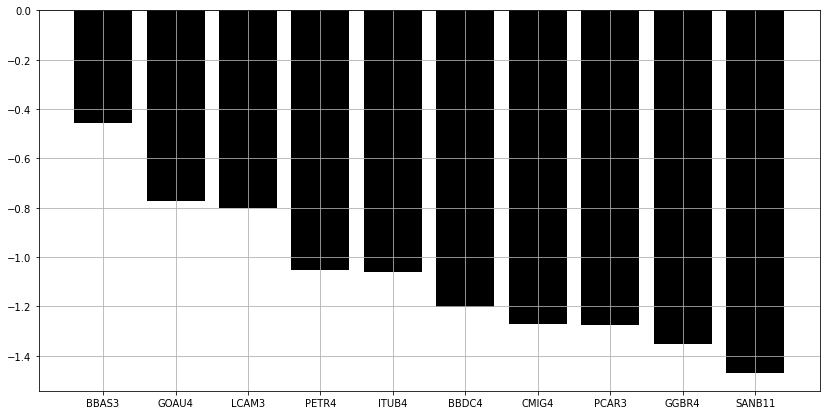

In [50]:
#showing top companies
import matplotlib.pyplot as plt

data_df = shares_info.iloc[0:10][:]

fig,ax = plt.subplots(figsize=(14,7))

ax.bar(data_df.index, data_df.result, color = 'black')
ax.grid()

plt.show